# **Classification Problem**
## ***Penguins Data***

A ***Penguins*** data set from Kaggle database chose to perform the machine learning (ML) algorithms, used for classification.\
I used three ML algoriths: ***Decision Tree Classifier***, ***Random Forest Classifier*** and ***Support Vector Machine***\
The libraries are imported in the first step.

In [120]:
import pandas as pd # For data importing and manipulation/data wrangling
import numpy as np # Basic mathemitics
import seaborn as sns ## Data visualization
import matplotlib.pyplot as plt ## Data visualization

The data is imported from a csv file using a function from pandas library

In [121]:
df=pd.read_csv("penguins_size.csv") # Data importing from CSV file
df.head() # Viewing first few lines of imported data

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


Missing values has been viewed using the below function. It can be seen that there some missing values in the data set.

In [122]:
df.isnull().sum() ## To check the missing values in a data set

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

It is important to address the missing values in a data set to get the best results from a fitted a model. I replaced the missing values in contineous variables by the mean of that column, while the missing values in the categorical variable are replaced with the mode value in that column.\
Below given are the code details.

In [123]:
mean=df["culmen_length_mm"].mean() ## Mean calculation
mean1=df["culmen_depth_mm"].mean()
mean2=df["flipper_length_mm"].mean()
mean3=df["body_mass_g"].mean()
mode=df["sex"].mode() ## Mode identification
mode

0    MALE
dtype: object

In [124]:
df["culmen_length_mm"]=df["culmen_length_mm"].fillna(mean) ## Replacing the missing values with the mean of the respective column
df["culmen_depth_mm"]=df["culmen_depth_mm"].fillna(mean1)
df["flipper_length_mm"]=df["flipper_length_mm"].fillna(mean2)
df["body_mass_g"]=df["body_mass_g"].fillna(mean3)
df["sex"]=df["sex"].fillna("MALE")
df["sex"]=df["sex"].replace(".", "MALE") ## Replacing the missing value with the mode of the respective column

Below you can see that all the missing values are addressed.

In [38]:
df.isnull().sum() ## Confirming the missing values replacement

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

As we can see in the imported data that some variables are contineous while some of them are categorical. So in the next step I converted the categorical variales into the contineous variables by converting them to the dummy variables.

In [47]:
df["sex"].value_counts() ### Counting the number of segments in a variable

MALE      179
FEMALE    165
Name: sex, dtype: int64

In [49]:
df["island"].value_counts()

Biscoe       168
Dream        124
Torgersen     52
Name: island, dtype: int64

In [48]:
df["sex"]=df["sex"].replace("MALE", 1) # Replacing the strings with the dummy variables
df["sex"]=df["sex"].replace("FEMALE", 0)

In [50]:
df["island"]=df["island"].replace("Biscoe", 1)
df["island"]=df["island"].replace("Dream", 2)
df["island"]=df["island"].replace("Torgersen", 1)

In [51]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,1,39.10000,18.70000,181.000000,3750.000000,1
1,Adelie,1,39.50000,17.40000,186.000000,3800.000000,0
2,Adelie,1,40.30000,18.00000,195.000000,3250.000000,0
3,Adelie,1,43.92193,17.15117,200.915205,4201.754386,1
4,Adelie,1,36.70000,19.30000,193.000000,3450.000000,0


As we are done with the data cleaning/manipulation, our next step is to divide the data into feature variables and the target variable. After dividing we will store the feature variables into the X variable and the target variable into the y variable

In [56]:
X=df.iloc[:,-6:] ### Feature variables
y=df["species"] ## Target variable

We will split the data into training and testing data 

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=0) ## Spliting data into two parts 80% training data
                                                                                        #20% test data

Model training is carried out using the training data

In [125]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier().fit(X_train, y_train) ### Training of model using training data

For prediction we used the test data

In [60]:
y_pred=model.predict(X_test)  ### Prediction of test data
y_pred 

array(['Adelie', 'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Gentoo',
       'Adelie', 'Chinstrap', 'Gentoo', 'Adelie', 'Adelie', 'Gentoo',
       'Adelie', 'Gentoo', 'Gentoo', 'Adelie', 'Adelie', 'Gentoo',
       'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Chinstrap', 'Adelie',
       'Gentoo', 'Gentoo', 'Gentoo', 'Adelie', 'Adelie', 'Gentoo',
       'Gentoo', 'Chinstrap', 'Adelie', 'Adelie', 'Adelie', 'Chinstrap',
       'Gentoo', 'Chinstrap', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Gentoo', 'Gentoo', 'Adelie', 'Gentoo', 'Chinstrap',
       'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Gentoo', 'Chinstrap', 'Gentoo',
       'Chinstrap', 'Chinstrap', 'Adelie', 'Gentoo', 'Gentoo', 'Gentoo',
       'Adelie', 'Gentoo', 'Gentoo'], dtype=object)

Visualizing the decision tree model

Text(0.5, 1.0, 'Decision tree trained model (Penguins data)')

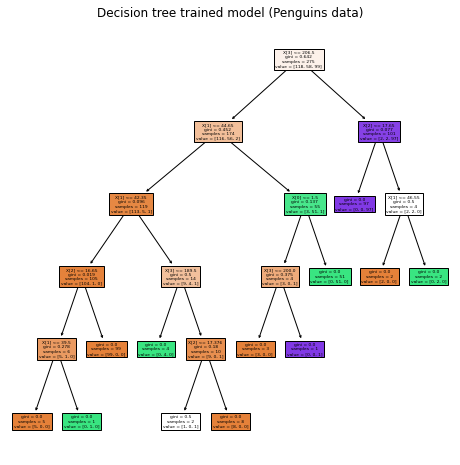

In [71]:
### DT visualization
from sklearn.tree import plot_tree
plt.figure(figsize=(8,8))    ### figure size
plot_tree(model, filled=True) ###DT model
plt.title("Decision tree trained model (Penguins data)") ### Title of the plot

To see the accuracy of the model accuracy score is calculated and it can be seen that the model is very accurate with 98.55% accuracy

In [68]:
from sklearn.metrics import accuracy_score
score=print("Accuracy score is:", accuracy_score(y_test, y_pred)*100)

Accuracy score is: 98.55072463768117


To see the classification pattern, classification report is generated

In [73]:
from sklearn.metrics import classification_report
print("Classification report",classification_report(y_test, y_pred))

Classification report               precision    recall  f1-score   support

      Adelie       0.97      1.00      0.99        34
   Chinstrap       1.00      0.90      0.95        10
      Gentoo       1.00      1.00      1.00        25

    accuracy                           0.99        69
   macro avg       0.99      0.97      0.98        69
weighted avg       0.99      0.99      0.99        69



Confusion matrix is the metrics used to see the problem in calssification, below the confusion matrix is extracted and visulaized in the form of heatmap

In [69]:
from sklearn.metrics import confusion_matrix
cm=print("Confusion matrix is:", confusion_matrix(y_test, y_pred))

Confusion matrix is: [[34  0  0]
 [ 1  9  0]
 [ 0  0 25]]


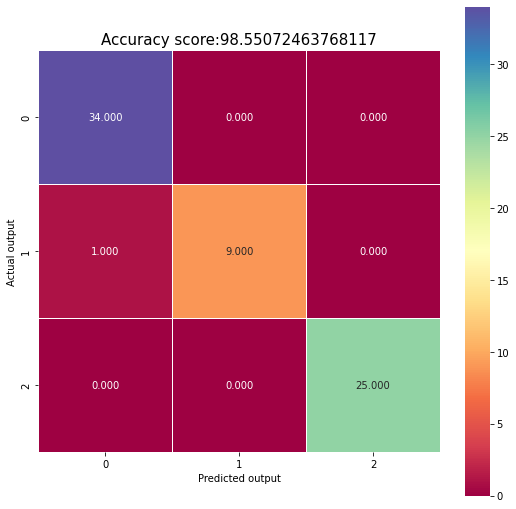

In [66]:
##Heat map of confusion matrix
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidth=.5, square=True,cmap="Spectral");
plt.ylabel("Actual output");
plt.xlabel("Predicted output");
all_sample_title="Accuracy score:{0}".format(score)
plt.title(all_sample_title, size=15);

# Random Forest classifier

On the same data another ML classification model ***Random Forest Classifier*** is also used. Almost all the steps are similar except the model used 

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=0) ### Data spliting

In [75]:
from sklearn.ensemble import RandomForestClassifier
model1=RandomForestClassifier().fit(X_train, y_train) ### Model training

In [77]:
y_pred1=model1.predict(X_test) ### Prediction of test data
y_pred1

array(['Adelie', 'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Gentoo',
       'Adelie', 'Chinstrap', 'Gentoo', 'Adelie', 'Adelie', 'Gentoo',
       'Adelie', 'Gentoo', 'Gentoo', 'Adelie', 'Adelie', 'Gentoo',
       'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Chinstrap', 'Adelie',
       'Gentoo', 'Gentoo', 'Gentoo', 'Adelie', 'Adelie', 'Gentoo',
       'Gentoo', 'Chinstrap', 'Adelie', 'Adelie', 'Adelie', 'Chinstrap',
       'Gentoo', 'Chinstrap', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Gentoo', 'Gentoo', 'Adelie', 'Gentoo', 'Chinstrap',
       'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Gentoo', 'Chinstrap', 'Gentoo',
       'Chinstrap', 'Chinstrap', 'Adelie', 'Gentoo', 'Gentoo', 'Gentoo',
       'Adelie', 'Gentoo', 'Gentoo'], dtype=object)

## Model accuracy/fitness

The Random forest calssifier showed exactly same accuracy like decison tree classifier model

In [78]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
score=print("Accuracy score is:", accuracy_score(y_test, y_pred1)) ## Accuracy score

Accuracy score is: 0.9855072463768116


In [79]:
print("Classification report", classification_report(y_test, y_pred1)) ### Classification report

Classification report               precision    recall  f1-score   support

      Adelie       0.97      1.00      0.99        34
   Chinstrap       1.00      0.90      0.95        10
      Gentoo       1.00      1.00      1.00        25

    accuracy                           0.99        69
   macro avg       0.99      0.97      0.98        69
weighted avg       0.99      0.99      0.99        69



In [82]:
cm1=confusion_matrix(y_test, y_pred1) ## Confusion matrix

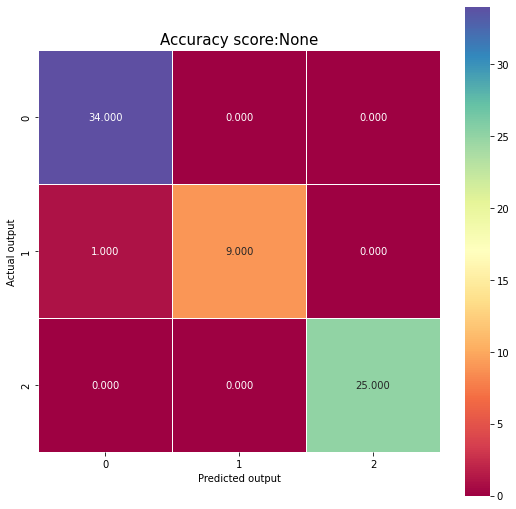

In [83]:
##Heat map of confusion matrix
plt.figure(figsize=(9,9))
sns.heatmap(cm1, annot=True, fmt=".3f", linewidth=.5, square=True,cmap="Spectral");
plt.ylabel("Actual output");
plt.xlabel("Predicted output");
all_sample_title="Accuracy score:{0}".format(score)
plt.title(all_sample_title, size=15);

# Support Vector Machine (SVM)
The next classification model is SVM

In [85]:
from sklearn import svm
model2=svm.SVC(kernel="linear") ##Model import
model2.fit(X_train, y_train) ### Model training

SVC(kernel='linear')

In [87]:
y_pred2=model2.predict(X_test) ### Prediction
y_pred2

array(['Adelie', 'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Gentoo',
       'Adelie', 'Chinstrap', 'Gentoo', 'Adelie', 'Adelie', 'Gentoo',
       'Adelie', 'Gentoo', 'Gentoo', 'Chinstrap', 'Adelie', 'Gentoo',
       'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Adelie',
       'Gentoo', 'Gentoo', 'Gentoo', 'Adelie', 'Adelie', 'Gentoo',
       'Gentoo', 'Chinstrap', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Gentoo', 'Chinstrap', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Gentoo', 'Gentoo', 'Adelie', 'Gentoo', 'Chinstrap',
       'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Chinstrap', 'Adelie', 'Gentoo', 'Chinstrap', 'Gentoo',
       'Chinstrap', 'Chinstrap', 'Adelie', 'Gentoo', 'Gentoo', 'Gentoo',
       'Adelie', 'Gentoo', 'Gentoo'], dtype=object)

It can be seen from the accuracy score that SVM is little bit less accurate as compared to DT classifier and RF calssifier models.

In [98]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix
score=print("Accuracy score is:", accuracy_score(y_test, y_pred2)) ### Accuracy score
print("Precision score is:", precision_score(y_test, y_pred2, average="macro")) ### Precision score
print("Recall score is:", recall_score(y_test, y_pred2, average="macro")) ### Recall score

Accuracy score is: 0.9565217391304348
Precision score is: 0.9439153439153438
Recall score is: 0.9235294117647058


In [100]:
cm3=confusion_matrix(y_test, y_pred2) ### Confusion matrix

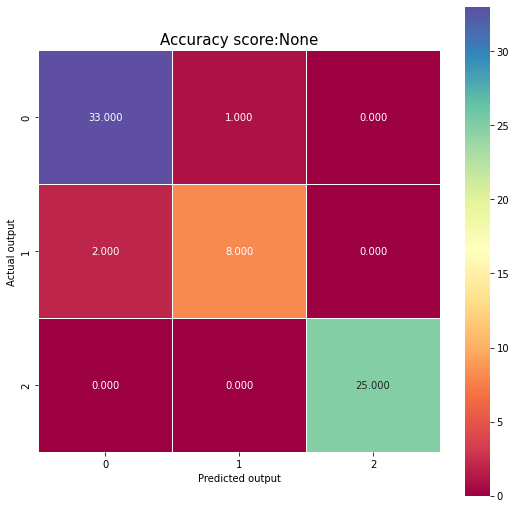

In [101]:
##Heat map of confusion matrix
plt.figure(figsize=(9,9))
sns.heatmap(cm3, annot=True, fmt=".3f", linewidth=.5, square=True,cmap="Spectral");
plt.ylabel("Actual output");
plt.xlabel("Predicted output");
all_sample_title="Accuracy score:{0}".format(score)
plt.title(all_sample_title, size=15);

### Visualizing the model data

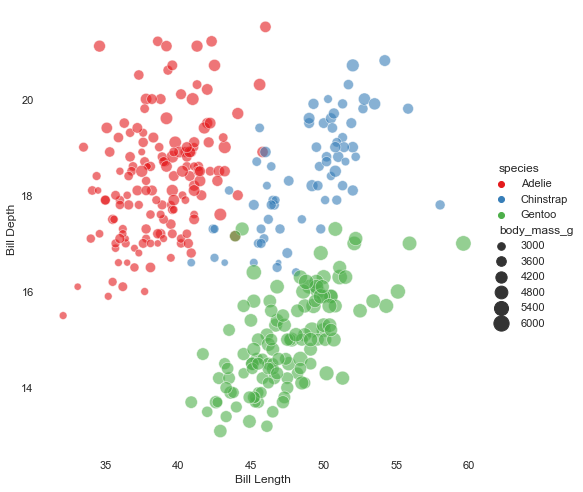

In [117]:
sns.set_theme(style="white") ## Theme of the plot
g = sns.relplot(
    data=df, sizes=(40, 250), alpha = 0.6,
    x="culmen_length_mm", y="culmen_depth_mm",
    hue="species", size="body_mass_g",
    palette="Set1", height = 7) ## Relplot

g.despine(left=True, bottom=True) # removes axis spines
g.set_axis_labels("Bill Length", "Bill Depth")

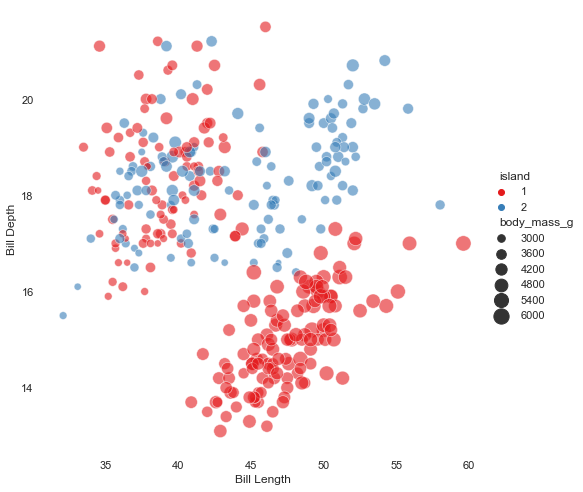

In [118]:
sns.set_theme(style="white")
g = sns.relplot(
    data=df, sizes=(40, 250), alpha = 0.6,
    x="culmen_length_mm", y="culmen_depth_mm",
    hue="island", size="body_mass_g",
    palette="Set1", height = 7)

g.despine(left=True, bottom=True) # removes axis spines
g.set_axis_labels("Bill Length", "Bill Depth")